In [1]:
from IPython.display import display, Markdown
from datetime import datetime
cur_datetime = datetime.now()
display(Markdown(f'# {cur_datetime.strftime("%d/%b/%Y %H:%M")}'))

# 20/Nov/2020 16:34

In [2]:
%%capture
# %matplotlib inline

# Dependences
from time import time
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import numpy as np


# Experiments
import run
from uniswap.model.sys_params import sys_params

In [3]:
# Run all experiments. Typical run duration for an Core-i3 laptop is about 2-3min.
# Tweak the prey_predator_abm/sim_params.py file if you want it to take longer (or not).
start_time = time()
experiments = run.run()
end_time = time()
print("Execution in {:.1f}s".format(end_time - start_time))


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (147437, 5, 8, 4)
Execution Method: parallelize_simulations
Execution Mode: parallelized
Total execution time: 222.53s
Execution in 228.1s


In [4]:
fees = [(1-(param/1000))*100 for param in sys_params['fee_numerator']]
conv_tols = [param*100 for param in sys_params['conv_tolerance']]
c_rules = [param for param in sys_params['c_rule']]

In [5]:
UNI_df = pd.read_pickle('./uniswap_events.pickle')
real_history = UNI_df.iloc[1:][['token_balance','eth_balance','UNI_supply']].reset_index(drop=True)
real_history.columns = ['real_DAI_balance', 'real_ETH_balance', 'real_UNI_supply']
UNI_df

,transactionHash,transaction_index,transaction_sender,address,data,topics,block_timestamp,blockNumber_dec,contract,event,...,block_group,agent,eth_delta,token_delta,uni_delta,eth_balance,token_balance,UNI_supply,invariant,convert_rate
0,0xbd773ccc33c831378f2aa2b7d4a9ae8a20ed9112ea9a...,150,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0x06239653922ac7bea6aa2b19dc486b9361821d37712...,2018-11-02 10:27:36+00:00,6629139,DAI,AddLiquidity,...,662,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,30000000000000000000,5900000000000000000000,0,30000000000000000000,5900000000000000000000,0,177000000000000000000000000000000000000000,201.546370
1,0xbd773ccc33c831378f2aa2b7d4a9ae8a20ed9112ea9a...,150,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x00000000000000000000000000000000000000000000...,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,2018-11-02 10:27:36+00:00,6629139,DAI,Transfer,...,662,0x0000000000000000000000000000000000000000,0,0,30000000000000000000,30000000000000000000,5900000000000000000000,30000000000000000000,177000000000000000000000000000000000000000,201.546370
2,0xd53f01fc0cabbf4083da93a023ddb81de91320027077...,97,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0x7f4091b46c33e918a0f3aa42307641d17bb67029427...,2018-11-02 10:33:56+00:00,6629171,DAI,EthPurchase,...,662,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,-25326059253325791,5000000000000000000,0,29974673940746674209,5905000000000000000000,30000000000000000000,177000449620109111204145000000000000000000,201.546370
3,0x53172898dbe437c784f7e4ac757087b28d1b06aa6b72...,53,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0x7f4091b46c33e918a0f3aa42307641d17bb67029427...,2018-11-02 10:35:47+00:00,6629177,DAI,EthPurchase,...,662,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,-10118429075406013,2000000000000000000,0,29964555511671268196,5907000000000000000000,30000000000000000000,177000629407442181233772000000000000000000,201.546370
4,0x6cef57fd37d7a2602c1236ff080c61c37e10980c7e3b...,24,0x11e4857bb9993a50c685a79afad4e6f65d518dda,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0xcd60aa75dea3072fbc07ae6d7d856b5dc5f4eee8885...,2018-11-02 10:38:18+00:00,6629190,DAI,TokenPurchase,...,662,0x11e4857bb9993a50c685a79afad4e6f65d518dda,10000000000000000,-1964761376358359468,0,29974555511671268196,5905035238623641640532,30000000000000000000,177000806558499339943044863018842396120272,201.546370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147434,0x4c4d18cda4948561bf4df0e9cbfac4b7e9aedfea0285...,13,0xb14d1163e4b3cb18edf864b523ed42a87c21f68c,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0xcd60aa75dea3072fbc07ae6d7d856b5dc5f4eee8885...,2019-12-31 23:31:34+00:00,9193158,DAI,TokenPurchase,...,919,0xa57bd00134b2850b2a1c55860c9e9ea100fdd6cf,555227276348537093,-71129353666089377834,0,5013841555546109396965,661804343765215722063362,3304234867026987131356,3318182120410961321903054254127069667340496330,129.324404
147435,0xf701ddbf48fc7ea18079f5bd9b7a29a5485abbee71ae...,29,0x614800dc2c7372f2595e66ca62cc2fa485f00c20,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0xcd60aa75dea3072fbc07ae6d7d856b5dc5f4eee8885...,2019-12-31 23:31:44+00:00,9193160,DAI,TokenPurchase,...,919,0xa57bd00134b2850b2a1c55860c9e9ea100fdd6cf,494601926415615730,-63347970222414138488,0,5014336157472525012695,661740995794993307924874,3304234867026987131356,3318191802096709075939561492313859130956275430,129.324404
147436,0x06257f58f391b2fa9201cf4fc09e668f1e0b03c59b96...,27,0xffbfdb803d38d794b5785ee0ac09f83b429d11b5,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0x7f4091b46c33e918a0f3aa42307641d17bb67029427...,2019-12-31 23:45:49+00:00,9193211,DAI,EthPurchase,...,919,0x8018280076d7fa2caa1147e441352e8a89e1ddbe,-2425103627055529511,312610256829251059712,0,5011911053845469483184,662053606051822558984586,3304234867026987131356,3318153786409383294

In [6]:
experiments.head(50)

,DAI_balance,ETH_balance,UNI_supply,price_ratio,simulation,subset,run,substep,timestep
0,5900000000000000000000,30000000000000000000,30000000000000000000,0.000000,0,0,1,0,0
1,5905000000000000000000,29974673940746674209,30000000000000000000,1.000000,0,0,1,1,1
2,5907000000000000000000,29964555511671268196,30000000000000000000,1.000000,0,0,1,1,2
3,5905035238623641640532,29974555511671268196,30000000000000000000,1.000000,0,0,1,1,3
4,5903071785798411448958,29984555511671268196,30000000000000000000,1.000000,0,0,1,1,4
5,5901109640216828255225,29994555511671268196,30000000000000000000,1.000000,0,0,1,1,5
6,5903009630907380568837,30004212911671268196,30009659152971520629,0.000000,0,0,1,1,6
7,5903009630907380568837,30004212911671268196,30009659152971520629,0.000000,0,0,1,1,7
8,5896674516410174369011,30036545047335992440,30009659152971520629,1.002149,0,0,1,1,8
9,5890366480352678616371,30068808190051863932,30009659152971520629,1.002142,0,0,1,1,9


## ANALYSIS

In [7]:
models = list()
for i in experiments['subset'].unique():
    models.append(experiments.loc[experiments['subset']==i,['DAI_balance', 'ETH_balance', 'UNI_supply']])
    
for df in models:
    df.columns = ['model_DAI_balance', 'model_ETH_balance', 'model_UNI_supply']
    df.reset_index(inplace=True)

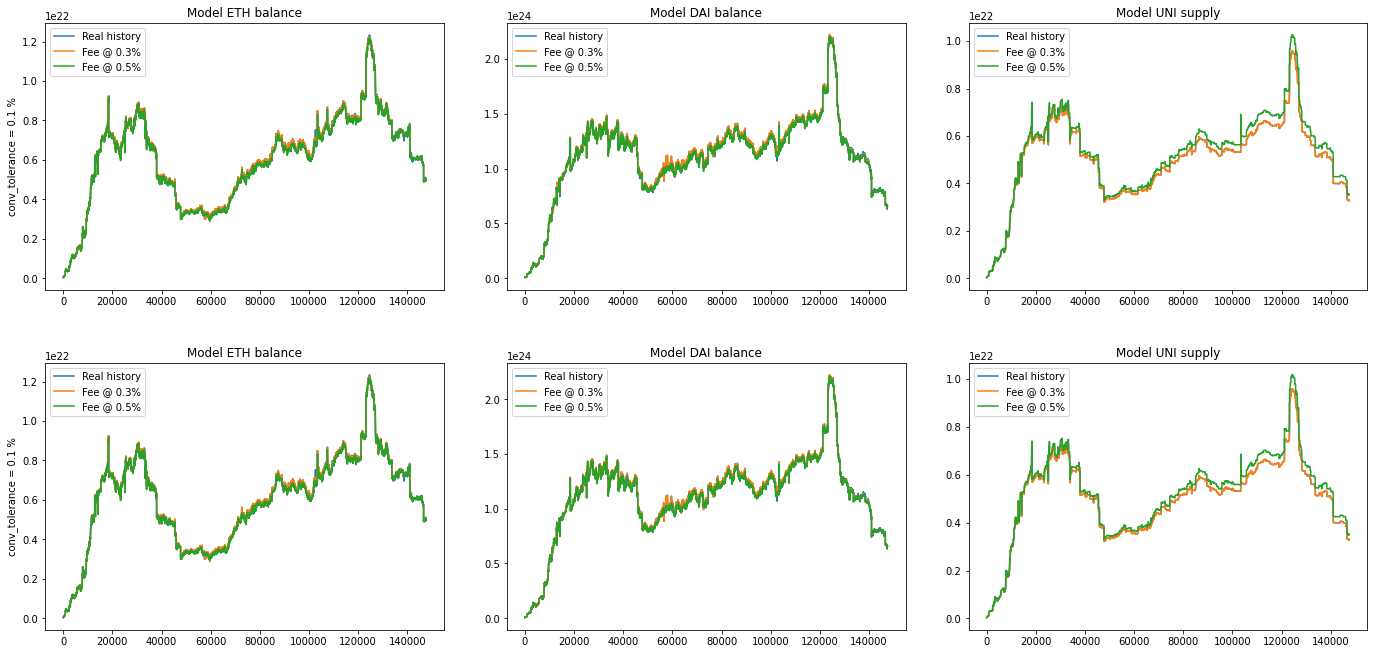

In [8]:
nplots = len(set(fees))
nrows = len(set(conv_tols))
ncols = 3

fig, axs = plt.subplots(ncols = ncols, nrows = nrows, figsize=(20,10))

plt.close()

for i in range(nrows):
    axs[i][0].plot(real_history['real_ETH_balance'], label='Real history')
    axs[i][1].plot(real_history['real_DAI_balance'], label='Real history')
    axs[i][2].plot(real_history['real_UNI_supply'], label='Real history')
    axs[i][0].set_title('Model ETH balance')
    axs[i][1].set_title('Model DAI balance')
    axs[i][2].set_title('Model UNI supply')
    axs[i][0].set_ylabel('conv_tolerance = {:.1f} %'.format(conv_tols[i]))
    
    for k in range(nplots):
        axs[i][0].plot(models[nplots*nrows*k + i]['model_ETH_balance'],
                       label='Fee @ {:.1f}%'.format(fees[nplots*nrows*k + i]))
        axs[i][1].plot(models[nplots*nrows*k + i]['model_DAI_balance'],
                       label='Fee @ {:.1f}%'.format(fees[nplots*nrows*k + i]))
        axs[i][2].plot(models[nplots*nrows*k + i]['model_UNI_supply'],
                       label='Fee @ {:.1f}%'.format(fees[nplots*nrows*k + i]))

    for j in range(ncols):
        axs[i][j].legend(loc='upper left')

fig.tight_layout(pad=4.0)
fig

In [9]:
df = experiments

prev_dai = pd.Series([np.nan]).append(df['DAI_balance'][:-1]).reset_index(drop=True)
prev_eth = pd.Series([np.nan]).append(df['ETH_balance'][:-1]).reset_index(drop=True)
df['delta_dai'] = df['DAI_balance'].diff()
df['delta_eth'] = df['ETH_balance'].diff()
df['istrade'] = (df['delta_dai'] > 0) != (df['delta_eth'] > 0)
df['volume'] = abs(df[df['istrade']]['delta_dai'])
df['volume'] = df['volume'].fillna(0)
df = df.drop(columns=['delta_dai','delta_eth','istrade'])

In [10]:
def ExpMovingAverage(values, window):
        weights = np.exp(np.linspace(-1., 0., window))
        weights /= weights.sum()
        a =  np.convolve(values, weights, mode='full')[:len(values)]
        a[:window] = a[window]
        return a

In [11]:
plot_data = experiments.copy()
plot_data[['DAI_balance',
           'ETH_balance',
           'UNI_supply',
           'volume']] = plot_data[['DAI_balance',
                                   'ETH_balance',
                                   'UNI_supply',
                                   'volume']]*1E-18
plot_data['ETH_price_DAI'] = plot_data['DAI_balance'] / plot_data['ETH_balance']
plot_data['UNI_price_DAI'] = 2 * plot_data['DAI_balance'] / plot_data['UNI_supply']

a = 0.5 * plot_data['ETH_price_DAI'][0] + 0.5 * plot_data['ETH_price_DAI']
plot_data['50_50_hodler_value'] = a.values

a = plot_data['50_50_hodler_value']/plot_data['50_50_hodler_value'][0] - 1
plot_data['50_50_hodler_return'] = a.values

a = plot_data['UNI_price_DAI']/plot_data['UNI_price_DAI'][0] - 1
plot_data['UNI_hodler_return'] = a.values

a = plot_data['ETH_price_DAI']/plot_data['ETH_price_DAI'][0] - 1
plot_data['ETH_hodler_return'] = a.values

plots = list()

for i in plot_data['subset'].unique():
    plots.append(plot_data[plot_data['subset'] == i])
for df in plots:
    df.reset_index(inplace=True)

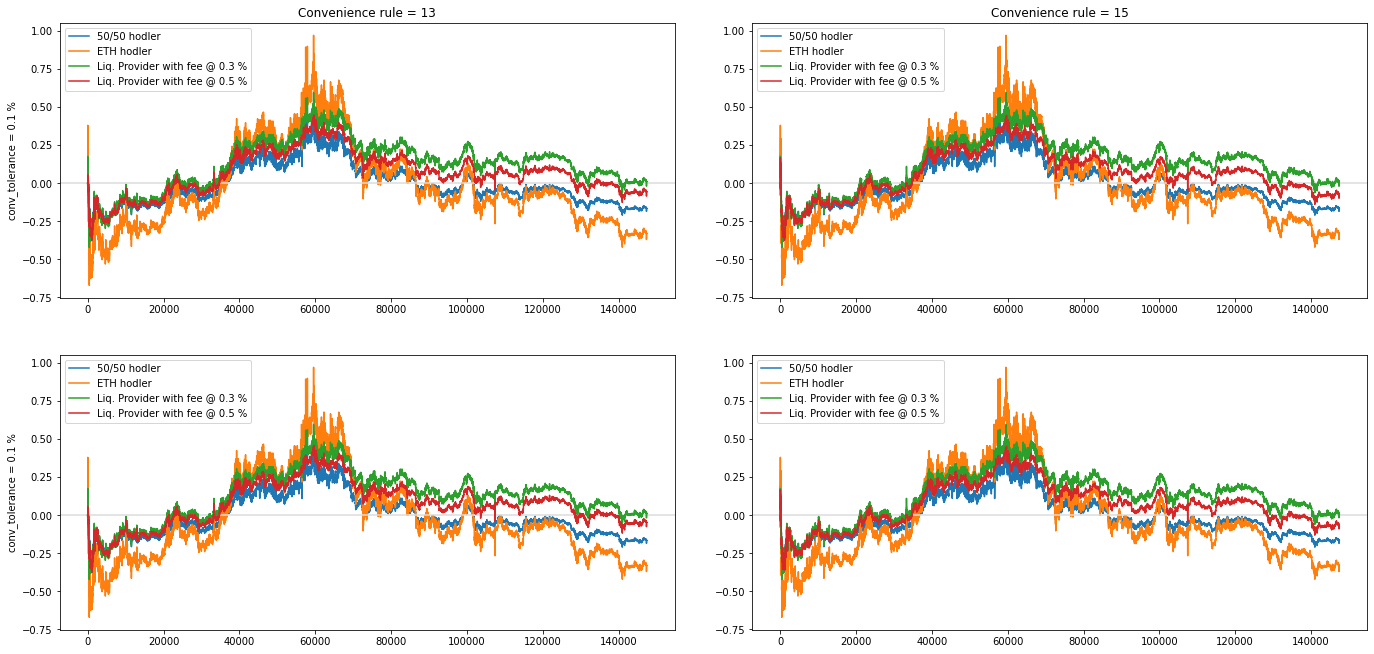

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib import animation, rc
rc('animation', html='jshtml', embed_limit=50)
plt.rcParams['figure.facecolor'] = 'white'
from matplotlib import cm
import matplotlib.ticker as ticker

nplots = len(set(fees))
nrows = len(set(conv_tols))
ncols = len(set(c_rules))

fig, axs = plt.subplots(ncols = ncols, nrows = nrows, figsize=(ncols*10,nrows*5))

plt.close()

if nrows > 1:
    for i in range(nrows):
        if ncols > 1:
            for j in range(ncols):
                axs[i][j].plot(plots[0]['50_50_hodler_return'], label=f'50/50 hodler')
                axs[i][j].plot(plots[0]['ETH_hodler_return'], label=f'ETH hodler')
                axs[i][j].axhline(0, color='gainsboro')
                axs[0][j].set_title(f'Convenience rule = {c_rules[ncols*j]}')
                axs[i][0].set_ylabel('conv_tolerance = {:.1f} %'.format(conv_tols[i]))
                for k in range(nplots):
                    ema = ExpMovingAverage(plots[nplots*nrows*k + ncols*j + i]['UNI_hodler_return'], 1)
                    axs[i][j].plot(ema, label='Liq. Provider with fee @ {:.1f} %'.format(fees[nplots*nrows*k + ncols*j + i]))
            for j in range(ncols):
                axs[i][j].legend(loc='upper left')
        else:
            axs[i].plot(plots[0]['50_50_hodler_return'], label=f'50/50 hodler')
            axs[i].plot(plots[0]['ETH_hodler_return'], label=f'ETH hodler')
            axs[i].axhline(0, color='gainsboro')
            axs[0].set_title(f'Convenience rule = {c_rules[0]}')
            axs[i].set_ylabel('conv_tolerance = {:.1f} %'.format(conv_tols[i])) 
            for k in range(nplots):
                ema = ExpMovingAverage(plots[nrows*k+i]['UNI_hodler_return'], 1)
                axs[i].plot(ema, label='Liq. Provider with fee @ {:.1f} %'.format(fees[nrows*k+i]))
            axs[i].legend(loc='upper left')
            sec_ax = axs[i].twinx()
            sec_ax.set_yscale('log')
else:
    if ncols > 1:
        for i in range(ncols):
            axs[i].plot(plots[0]['50_50_hodler_return'], label=f'50/50 hodler')
            axs[i].plot(plots[0]['ETH_hodler_return'], label=f'ETH hodler')
            axs[i].axhline(0, color='gainsboro')
            axs[0].set_title(f'Convenience rule = {c_rules[0]}')
            axs[i].set_ylabel('conv_tolerance = {:.1f} %'.format(conv_tols[i])) 
            for k in range(nplots):
                ema = ExpMovingAverage(plots[nrows*k+i]['UNI_hodler_return'], 1)
                axs[i].plot(ema, label='Liq. Provider with fee @ {:.1f} %'.format(fees[nrows*k+i]))
            axs[i].legend(loc='upper left')
            sec_ax = axs[i].twinx()
            sec_ax.set_yscale('log')
    else:
        axs.plot(plots[0]['50_50_hodler_return'], label=f'50/50 hodler')
        axs.plot(plots[0]['ETH_hodler_return'], label=f'ETH hodler')
        axs.axhline(0, color='gainsboro')
        axs.set_title(f'Convenience rule = {c_rules[0]}')
        axs.set_ylabel('conv_tolerance = {:.1f} %'.format(conv_tols[0])) 
        for j in range(0, nplots):    
            ema = ExpMovingAverage(plots[j]['UNI_hodler_return'], 1)
            axs.plot(ema, label='Liq. Provider with fee @ {:.1f} %'.format(fees[j]))
        axs.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
        axs.yaxis.tick_right()
        axs.legend(loc='upper left')
        axs.set_ylabel('conv_tolerance = {:.1f} %'.format(conv_tols[0]))
        sec_ax = axs.twinx()
        #     sec_ax.plot(plot_data.loc[i]['volume'], label='Volume')
        sec_ax.set_yscale('log')

fig.set_facecolor('white')
fig.tight_layout(pad=4.0)
fig